## Importing Dependencies

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data 

In [262]:
#read data
data = pd.read_csv("winequality-white.csv", sep=";")

In [263]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [264]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [265]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [266]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [267]:
data['quality'].value_counts()

bad     3838
good    1055
Name: quality, dtype: int64

Number of white wines:  4898
Number of features:  12


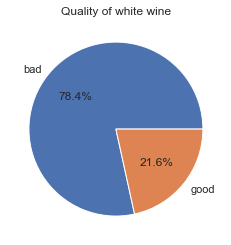

c:\Users\rafae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


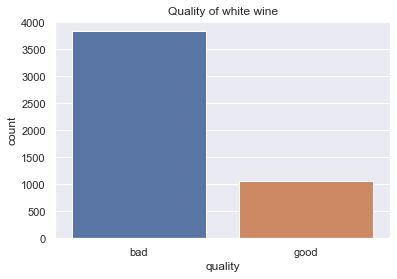

In [268]:
# white wine data
nWines = len(data)
nFeatures = len(data.columns)
print("Number of white wines: ", nWines)
print("Number of features: ", nFeatures)

#get the percentage of the different quality values
nQuality = data["quality"].value_counts() 

#plot pie the percentage of the different quality values
plt.pie(nQuality, labels = nQuality.index, autopct='%1.1f%%')
plt.title("Quality of white wine")
plt.show()

#plot the countplot of the different quality values
sns.countplot(data["quality"])
plt.title("Quality of white wine")
plt.show()



In [269]:
# Encoding the categorical data
data['quality'] = data['quality'].map({'bad':0, 'good':1})

In [270]:
data['quality'].value_counts()


0    3838
1    1055
Name: quality, dtype: int64

c:\Users\rafae\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


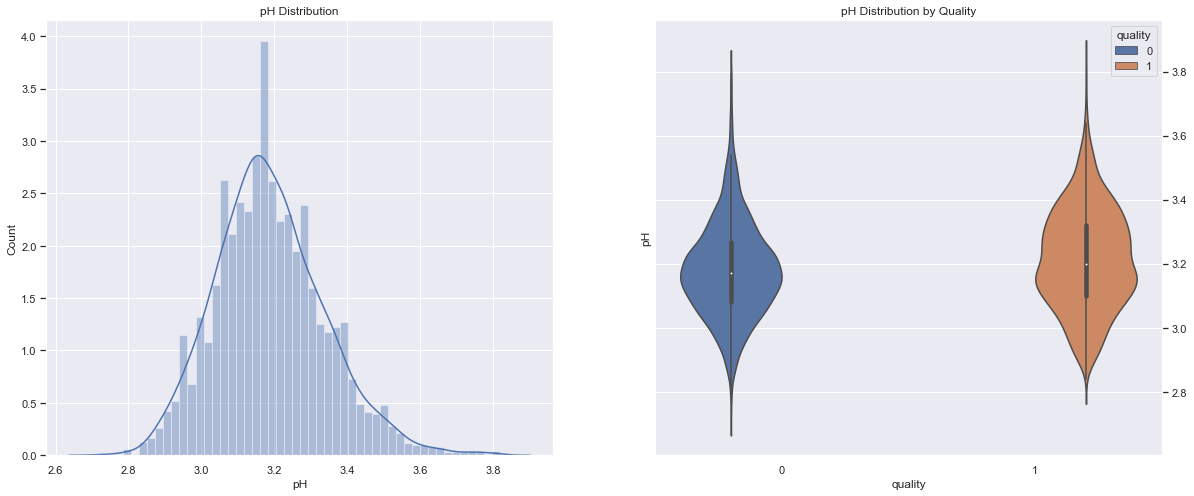

In [271]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.distplot(data['pH'], ax=ax[0])
ax[0].set_title('pH Distribution')
ax[0].set_ylabel("Count")
ax[0].yaxis.tick_left()

sns.violinplot(x="quality", y="pH", data=data, hue = "quality", ax=ax[1])
ax[1].set_title('pH Distribution by Quality')
ax[1].set_ylabel("pH")
ax[1].yaxis.tick_right()



In [272]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = data.drop('quality', axis = 1).values
y = data['quality'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)



X_train shape:  (3918, 11)
X_test shape:  (980, 11)
y_train shape:  (3918, 1)
y_test shape:  (980, 1)


In [273]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train shape:  (3918, 2)
X_test shape:  (980, 2)
y_train shape:  (3918, 1)
y_test shape:  (980, 1)


## Funções auxiliares

In [274]:
def computeCost(X,y,theta):
    """
   Take the numpy arrays X, y, theta and return the cost function J for this theta. 

    """
    m = len(y)
    h = np.dot(X, theta)
    J = (1/(2*m)) * (np.sum(np.power((h - y),2)))

    
    return J

In [275]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    #number of training examples 
    m=len(y)
    
    #vector of the model predictions for all training examples
    z = np.dot(X, theta)
    h = 1/ ( 1 + np.exp(-z))
         
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))

    #cost function
    cost = 1/m * sum(error)
       
    #vector of gradients of all model parameters theta   
    grad = 1/m * np.dot(X.transpose(),(h - y))
    
    return cost[0] , grad

In [276]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    #number of training examples
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta, X, y)
        # neste caso o grad já esta a dividir por m
        theta = theta - alpha * grad
        J_history.append(cost)
    
    return theta , J_history

In [277]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    gz = 1/(1 + np.exp(-z))
    
    return gz

In [278]:
data_n=data.values # extract only the values of the two columns from the dataFrame data
X= data_n[:,0]
y= data_n[:,11]

m=len(y)

# print(X.shape)
# print(y.shape)

y=y.reshape(m,1)
X=X.reshape(m,1)

#print(X.shape)

#To take into account the intercept term theta_0 you need to add an additional first column to X and 
#set it to all ones (np.ones). #This allows to treat  theta_0 as simply another ‘feature parameter’. 

X=np.append(np.ones((m,1)),X,axis=1) 

#Initialize the fitting parameters theta to 0 (np.zeros)
n=X.shape[1]

theta=np.zeros((n,1))

print("ComputeCost(X,y,theta)= "+str(computeCost(X,y,theta)))

#theta,J_history = gradientDescent(X,y,theta,0.01,1500)
#print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

#plt.plot(J_history)
#plt.xlabel('Iteration')
#plt.ylabel('$J(\Theta)$')
#plt.title('Cost function using Gradient Descent')

ComputeCost(X,y,theta)= nan


## Normalização

In [279]:
def featureNormalization(X):
    
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X - mean) / std
    
    return X_norm , mean , std

In [280]:
#Run featureNormalization to normalize X, store the means and stds.

X, X_mean, X_std = featureNormalization(X)

#After normalizing the features, add an extra column of 1's corresponding to x0 = 1.
XX = np.append(np.ones((X.shape[0],1)),X,axis=1)

# Inicialize vector theta = 0
initial_theta = np.zeros((XX.shape[1],1))

#Run costFunction
cost, grad = costFunction(initial_theta, XX, y)

print("Cost of initial theta is",round(cost,3) )   # ANSWER: Cost of initial theta is 0.693
print("Gradient at initial theta (zeros):",grad)  #ANSWER: Gradient at initial theta (zeros): [[-0.1 ] [-0.28122914] [-0.25098615]]

Cost of initial theta is nan
Gradient at initial theta (zeros): [[nan]
 [nan]
 [nan]]


C:\Users\rafae\AppData\Local\Temp\ipykernel_10280\1054891972.py:5: RuntimeWarning: invalid value encountered in true_divide
  X_norm = (X - mean) / std


IndexError: index 5 is out of bounds for axis 1 with size 2

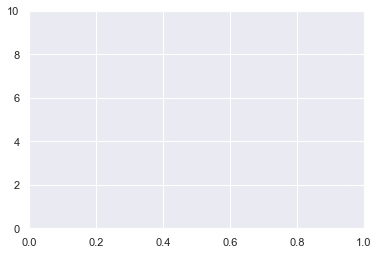

In [281]:
plt.ylim([0,10])
plt.scatter(X[:,5], y)
plt.scatter(X[:,6], y)

## Testes

In [ ]:
# Run gradientDescent with learning rate 0.5 and 400 iterations. 

theta , J_history = gradientDescent(XX,y,initial_theta,0.1,50)

print("Theta optimized by gradient descent:",theta)

print("The cost for the optimized theta:",round(J_history[-1],3))  #ANSWER: The cost for the optimized theta: 0.205

In [ ]:
theta2 = 0
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.01,500)
print("h(x) = "+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2 + "+str(round(theta2[3,0],2))+"x3 + "+str(round(theta2[4,0],2))+"x4")
#print(theta2)

In [ ]:
lr=[0.01, 0.1, 0.5, 1]
for i in lr:
    theta , J_history = gradientDescent(XX,y,initial_theta,i,400)
    plt.plot(J_history)
plt.legend(["0.01","0.1","0.5","1"])